In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./Salary_Data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


* Contiene 6704 filas y 6 columnas la cuales 3 son numericas y las otras 3 descriptiva
---

In [5]:
data = data.rename(columns={"Age":"edad" , "Gender":"genero" , "Education Level":"nivel_educacion",
                            "Job Title":"titulo_de_trabajo" , "Years of Experience":"años_experiencia","Salary":"salario"})

* #### Remplazo de idioma en las columnas para que sea mas legible.
-----

In [6]:
data.describe()

,edad,años_experiencia,salario
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


## Vemos como se comportan los valores numericos
   * ### EDAD: Media = 33 |-| Maxima = 62 |-| Minima = 21
   * ### AÑOS DE EXPERIENCIA: Media = 8 |-| Maxima = 34 |-| Minima = 0
   * ### SALARIO: Media = 115327 |-| Maxima = 250000 |-| Minima = 350 
---

---
* # graficamos los datos numericos para entenderlos mejor y ver como se comportan.

In [7]:
import seaborn as sns

Text(0.5, 1.0, 'Distribución de Años de Experiencia')

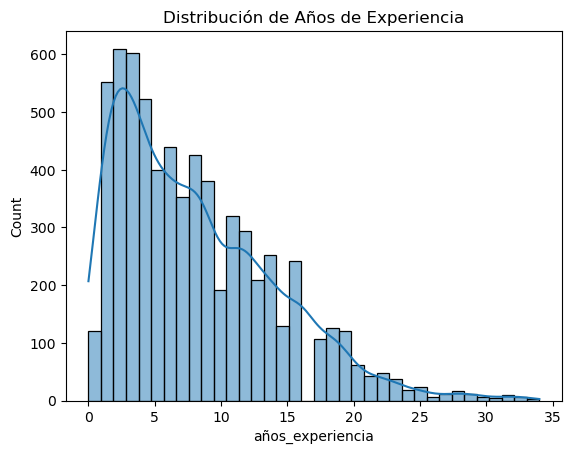

In [8]:
#Creamos una series (subplot) de graficos para que esten todos juntos
sns.histplot(data['años_experiencia'],kde=True)
plt.title('Distribución de Años de Experiencia')

Text(0.5, 1.0, 'Distribución de Salarios')

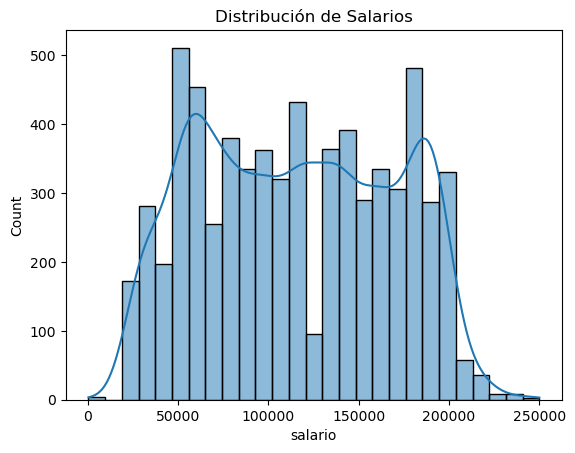

In [9]:
sns.histplot(data["salario"],kde=True)
plt.title('Distribución de Salarios')

Text(0.5, 1.0, 'Distribución de Edades')

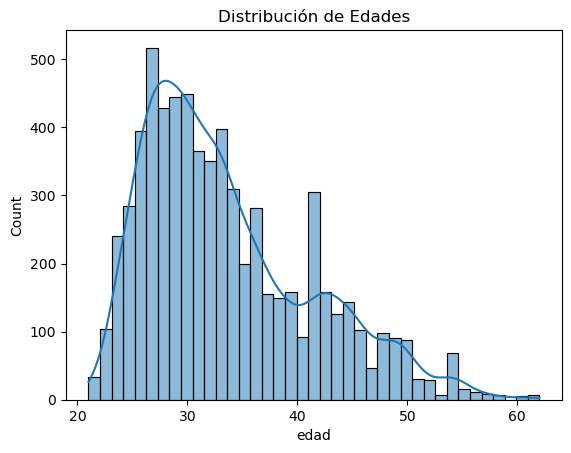

In [10]:
sns.histplot(data['edad'], kde=True)
plt.title('Distribución de Edades')

* # Observación de los graficos
    * ## Podemos ver que la edad y los años de experiencia se comportan de la misma manera y tienen la tendencia mas alta al principio.
       * ### Por ejemplo en los años de experiencia la tendencia mas alta es entre 0 y 5 años
       * ### Por ejemplo en la edad de las persona la tendencia mas alta es entre 21 y 31 años
    * ## En el caso de los salarios se comportan de una manera relativa, las tendencias mas alta son en salarios de 50,000 y 175,000 usd
---

In [11]:
### Vemos si el data set contiene datos nulos
print(data.isna().sum())
print(f"Numeros de filas{data.shape}columnas")

edad                 2
genero               2
nivel_educacion      3
titulo_de_trabajo    2
años_experiencia     3
salario              5
dtype: int64
Numeros de filas(6704, 6)columnas


* ### Vemos que todas contienen algunos valores nulos. Solamente vamos a reemplazar por 0 los valores N/A que esten en las columnas con valores numericos. (haremos solamente en los valores numericos para que no interfiera cuando hagamos algún modelo de regresión)
----

In [12]:
#### Remplazaremos los valores NaN por el valor de 0 
data["edad"] = data["edad"].fillna(0)
data["años_experiencia"] = data["años_experiencia"].fillna(0)
data["salario"] = data["salario"].fillna(0)

----
* ### Veremos las correlaciones de los valores numericos.

C:\Users\Acer\AppData\Local\Temp\ipykernel_1804\350149745.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = data.corr()


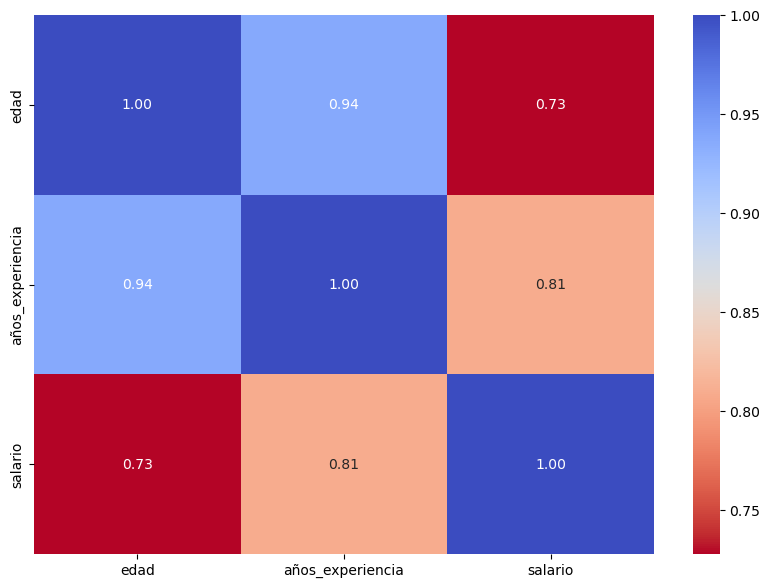

In [13]:
correlacion = data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlacion, annot=True , fmt='.2f' , cmap=plt.cm.coolwarm_r)
plt.show()

* ### podemos ver que la correlación entre los 3 son muy buena, podemos obtener buenos resultados en los modelos de predicción. Tengamos en cuenta que al ser pocos valores numericos tendremos que dummyficar las demas columnas con los datos descriptivos.
----

---
* # Ahora crearemos gráficos para ver como se distribuyen y se comportan lo demas valores (Usaremos como predicción el salario)

<AxesSubplot:xlabel='genero', ylabel='salario'>

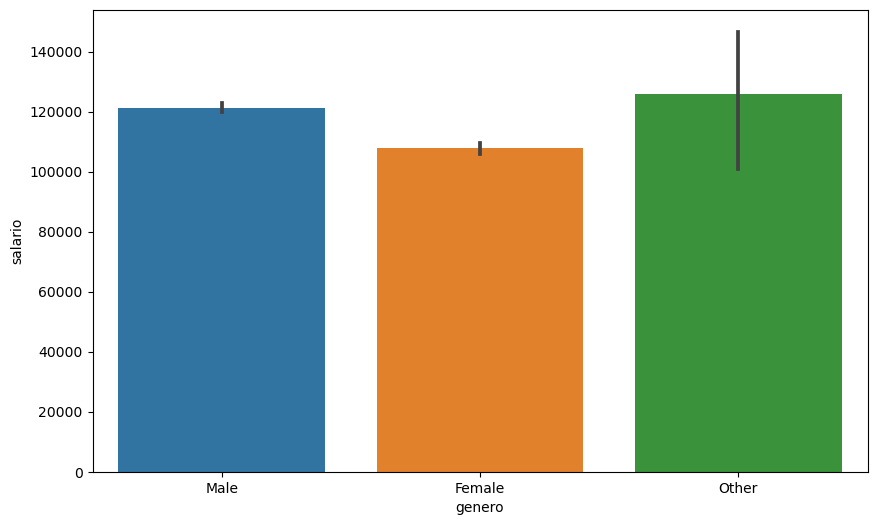

In [14]:
### Creamos una figura con su respectivo tamaño y le indicamos los valores de X e Y
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'genero', y = 'salario', data = data)

* ### Podemos ver que no hay diferencia entre los generos en cuanto a ganancias. apenas un poco mas en el genero masculino.
----

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, "Bachelor's"),
  Text(1, 0, "Master's"),
  Text(2, 0, 'PhD'),
  Text(3, 0, "Bachelor's Degree"),
  Text(4, 0, "Master's Degree"),
  Text(5, 0, 'High School'),
  Text(6, 0, 'phD')])

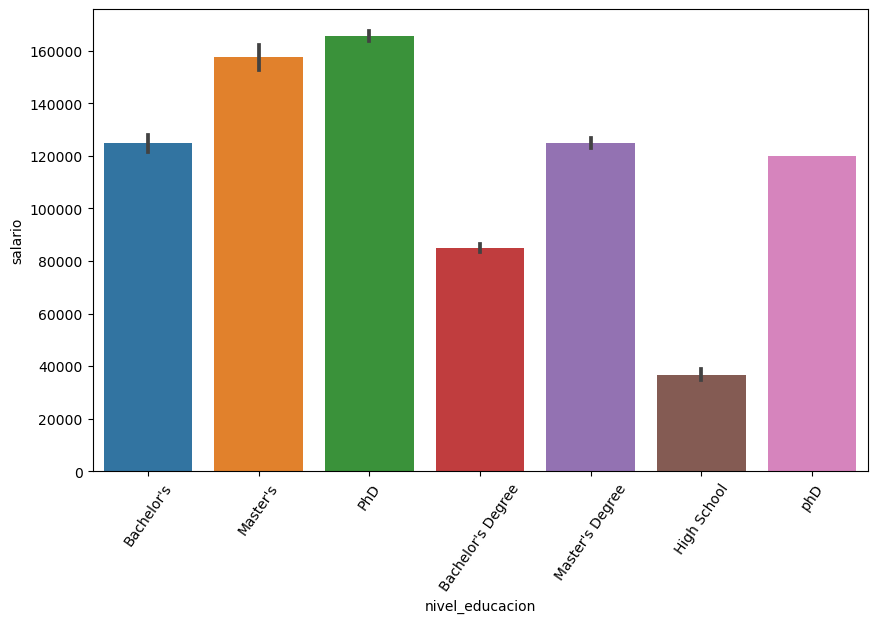

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'nivel_educacion', y = 'salario', data = data)
plt.xticks(rotation=55)

* ### Observamos que en el nivel de eduación tienen un mayor salario: Docotres y los profesionales con algun "masters".
* ### Se puede observar también que los profesionales que solamente hicieron la secundaria tienen el salario mas bajo entre todos, luego le siguen los que tienen un titulo de grado.
    * ## En resumen podemos decir que el nivel de educación es una muy buena variable predictora. Se puede entender muy facil y claro las diferencias que hay con los salarios de unos y otros.
----

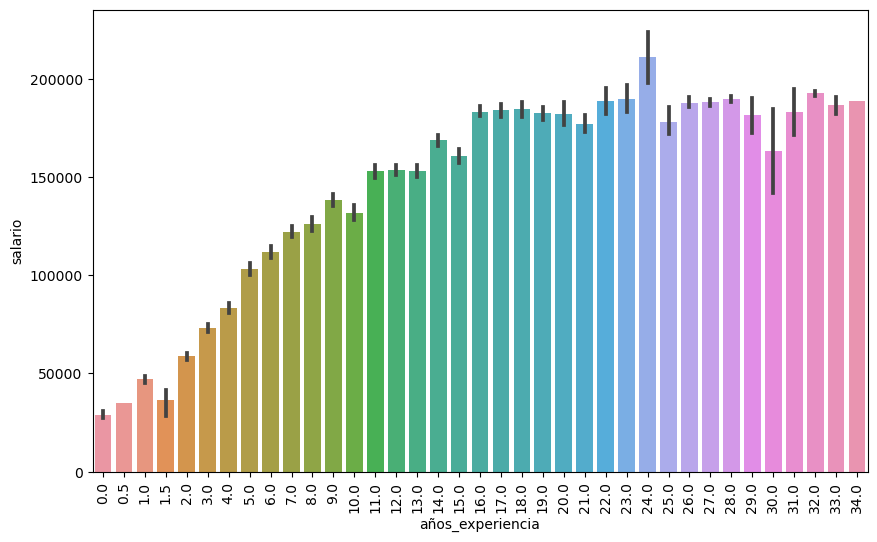

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'años_experiencia', y = 'salario', data = data)
plt.xticks(rotation=90)
plt.show()

* ### En los años de experiencia se observa que el salario es progresivo, mas años de experiencia o antiguedad, mayor es el salario.
    * ## Los datos en años de experiencias son una muy buena variable predictora 
----

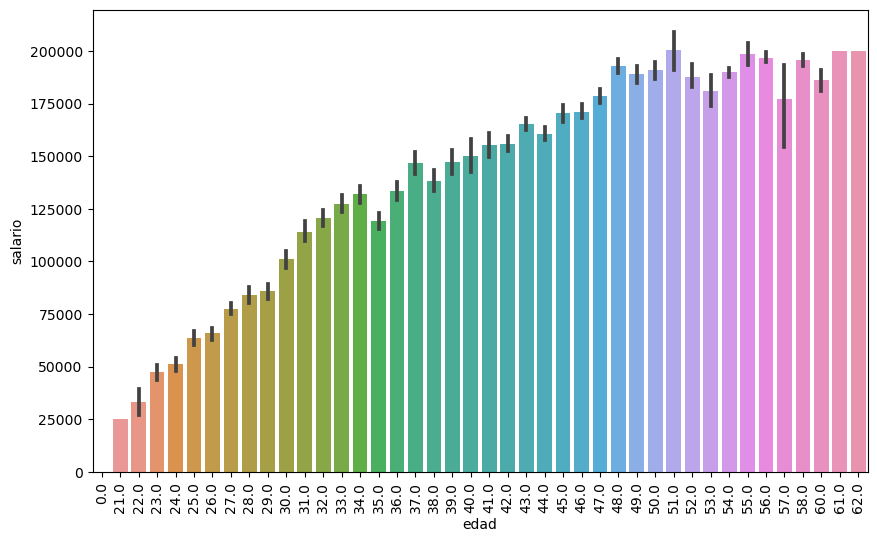

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'edad', y = 'salario', data = data)
plt.xticks(rotation=90)
plt.show()

* ### En los datos sobre la EDAD observamos que ocurre lo mismo que en los años de experiencia, (para no decir que son muy similares). Es entendible ya que una persona va teniendo experiencia o antiguedad en su rubro a traves de los años.
    * ## Se puede decir que la edad también es una buena variable predcitora.
----

---
# REGRESIÓN LINEAL (variables numericas y dumificadas)
* #### Hacemos directamente con todas las variables por que solamente tenemos 3 valores numericos y uno es para predecir. Entonces dumificaremos los demas datos asi nos queda un dataset con todos valores numericos y asi empezar a hacer las predicciones.

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X = data[["edad","años_experiencia"]]

In [20]:
genero_dummy = pd.get_dummies(data["genero"] , prefix="genero")
nivel_educacion_dummy = pd.get_dummies(data["nivel_educacion"] , prefix="nivel_educacion")
trabajo_dummy = pd.get_dummies(data["titulo_de_trabajo"] , prefix="titulo_trabajo")

In [21]:
data_final = pd.concat([X,genero_dummy,nivel_educacion_dummy,trabajo_dummy],axis=1)
data_final.head()

,edad,años_experiencia,genero_Female,genero_Male,genero_Other,nivel_educacion_Bachelor's,nivel_educacion_Bachelor's Degree,nivel_educacion_High School,nivel_educacion_Master's,nivel_educacion_Master's Degree,...,titulo_trabajo_Supply Chain Manager,titulo_trabajo_Technical Recruiter,titulo_trabajo_Technical Support Specialist,titulo_trabajo_Technical Writer,titulo_trabajo_Training Specialist,titulo_trabajo_UX Designer,titulo_trabajo_UX Researcher,titulo_trabajo_VP of Finance,titulo_trabajo_VP of Operations,titulo_trabajo_Web Developer
0,32.0,5.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,3.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X = data_final
y = data[["salario"]]

In [23]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [24]:
lm.score(X,y)*100

88.73484277907131

* ## Vemos que de prima tenemos un resultado muy alto y bueno %88.73, veremos que sucede con otros modelos, si mejora la eficacia o no.
---

----
* # REGRESION LINEAL (con "RFE")

In [29]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [33]:
#### Usaremos como mayormente el kernel "LINEAL".
estimator =  SVR(kernel="linear")

#### Va a tardar mucho, pero le diremos que nos eliga de las 205 columnas , las mejores 25 para ver como se comporta el modelo
selector = RFE(estimator , n_features_to_select=12 , step=1)
selector = selector.fit(X,y)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

In [34]:
#### el ranking de los mejores segun el RFE
selector.ranking_

array([  1,   1,   1,   1,  96,   1,   1,   1,  12,   1,   1, 125, 126,
       129, 108,   8,  91, 137, 120, 142, 145, 146,  39, 123, 153, 105,
       157,  63, 133, 164,   1, 169,   1,  66, 144, 152,  51,  49, 185,
       187,  24, 107,  95,  19, 151, 109,  73,  53, 121, 182, 170,  97,
       173,  48,  22,  40,  32,   2,  43, 110,  98, 191,  28, 134,  11,
       124, 131, 127,  99,  84, 143,  57,  60, 104, 141, 159,  42, 175,
       176, 179, 139,  61,  41,  21,  89,  64,  26,  71,  68, 192,  86,
        76,  67, 168, 160,   5,  35, 158, 161,  23,  27, 193, 194,  34,
        90,  88,   6,  14,  20,  47, 171, 190, 184, 186, 188,   9, 189,
       149,  15,   1, 174, 172,  46, 180,  25, 106,  16,  18,  17,  52,
        36,  45, 154,  37, 155, 128,  94,  54,  77, 132,  80,  75,  30,
       100,  82,  58,  69, 166,  33,  87, 150, 156,  29, 148, 101, 162,
       112, 102,  55,  81, 140,  56,  72,  93,  74,  85,  70, 147,  62,
        44,  65,   3,  59, 183,  31, 181, 103,  92,  78, 177,  7

In [26]:
X_rfe = data_final[['edad', 'años_experiencia', 'genero_Female', 'genero_Male',"nivel_educacion_Bachelor's",
       "nivel_educacion_Bachelor's Degree", 'nivel_educacion_High School',"nivel_educacion_Master's Degree",
       'nivel_educacion_PhD']]

In [27]:
lm = LinearRegression()
lm.fit(X_rfe,y)

LinearRegression()

In [28]:
lm.score(X_rfe,y)*100

77.0959745017663

* ## Se puede ver que el modelo decrecio alrededor de un %10. Es mejor tener en cuenta toda las variables
---

-----
* # REGRESIÓN LINEAL (con grupo de entrenamiento y test)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [85]:
#### Dividimos los datos en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
### creamos y entrenamos el modelo
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [87]:
### Creamos la predicción
y_pred = model.predict(X_test)

In [88]:
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

##### Resultados
print(f"Error absoluto medio (MAE): %", mae)
print(f"Error cuadrático medio (MSE): %", mse)
print(f"Coeficiente de determinación (R2) %:", r2*100)

Error absoluto medio (MAE): % 6463981263410.954
Error cuadrático medio (MSE): % 6.423393972000234e+27
Coeficiente de determinación (R2) %: -2.3796972012309008e+20


* ## El resultado en el R2 no es nada bueno, lo mismo para el MAE. El unico buen resultado que tenemos es el MSE
---

-----
* # SVR (support vector regressión).

In [64]:
### KERNEL de tipo radial "RBF"
regressor = SVR(kernel="rbf", gamma = 0.1)
regressor.fit(X,y)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma=0.1)

In [66]:
#### Ahora en este cambiamos el kernel a tipo polinomio 
regressor_polinomio = SVR(kernel="poly", degree = 3)
regressor_polinomio.fit(X,y)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

In [65]:
regressor.score(X,y)*100

1.193384525956509

In [67]:
regressor_polinomio.score(X,y)*100

8.564975549711829

* ## Con el SVR obtenemos un resultado muy bajo y malo tanto para el kernel Rbf y Polinomio.
----

---
* # Validación cruzada para la regresión (Cross validation)

In [35]:
from sklearn.model_selection import cross_val_score

In [69]:
#Aplivamos la validacion cruzada con un fold de 5
scores = cross_val_score(regressor , X,y , cv=10)

print("Eficacia del modelo haciendo la validación cruzada en cada fold son : %",scores)

print("El score promedio en la validación cruzada es de:",scores.mean()*100)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

Eficacia del modelo haciendo la validación cruzada en cada fold son : % [-0.02825148 -1.38724185 -0.40245231 -0.18674226 -0.03308785 -0.62839385
 -0.18142285 -0.31005446 -0.02105712 -0.13380936]
El score promedio en la validación cruzada es de: -33.125134017641976


* ### Vemos un resultado realmente negativo también haciendo una validación cruzada.
----


* # ÁRBOL DE DECISIÓN

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
##### modelo de árbol de decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
#### predicciones en los datos de prueba
y_pred = model.predict(X_test)

#### Ver precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy*100)

Precisión del modelo: 78.13121272365805


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [41]:
### HACEMOS UNA VALIDACIÓN CRUZADA PARA VER COMO SE SIGUE COMPORTANDO EL MODELO.

scores = cross_val_score(model, X, y, cv=25)
print("Precisión promedio en validación cruzada:", scores.mean()*100)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=25.
  warnings.warn(


Precisión promedio en validación cruzada: 77.26277534261777


* ## Podemos observar que la validación curzada para el Árbol de decisión obtenemos el mismo resultado. Es decir que es bastante bueno el modelo creado. %78,23
----

---
* # RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [27]:
forest = RandomForestClassifier(n_jobs=2 , oob_score=True , n_estimators=700)
forest.fit(X,y)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1804\1573120889.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X,y)


RandomForestClassifier(n_estimators=700, n_jobs=2, oob_score=True)

In [145]:
print(f"Eficacia del modelo para el random forest: %{forest.oob_score_*100:.2f}")

Eficacia del modelo para el random forest: %81.00


* ## Creando un modelo de RANDOM FOREST el resultado subio apenas un poco, %81.30 en la predicción
---
* # ES EL MEJOR RESULTADO PARA LA PREDICCIÓN.

In [26]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [30]:
## Separamos los datos en entrenamiento y test
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

In [31]:
### Rescalar las variables
sc = StandardScaler()

In [32]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
forest_scaler = RandomForestClassifier(n_estimators=200)
forest_scaler.fit(X_train , y_train)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1804\473511182.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_scaler.fit(X_train , y_train)


RandomForestClassifier(n_estimators=200)

In [34]:
y_pred = forest_scaler.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud:", accuracy*100)

Exactitud: 77.38568588469185


* # Obtenemos un %77.38 con los datos RESCALADO. sigue siendo el mejor modelo EL RANDOM FOREST con %81 de eficacia.